In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.feature_map import ChebRx
from squlearn.expectation_operator import IsingHamiltonian
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.qnn.qnn import QNN
from squlearn.optimizers import SLSQP
from qiskit.providers.fake_provider import FakeManilaV2

In [2]:
executor = Executor(FakeManilaV2())

Define parameterized quantum circuit $Q(x,\theta)$

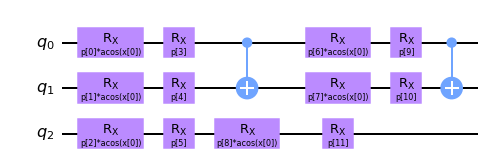

In [3]:
nqubits = 3

number_of_layers = 2
pqc = ChebRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw()

Definition of the cost operator:
$\hat{H} = J \sum\limits_{i < j} Z_i Z_j + h\sum\limits_i Z_i + c$

In [4]:
ising_op = IsingHamiltonian(nqubits, I="S", Z="S", ZZ="S")
print(ising_op)

SummedOp([
  1.0*p[0] * III,
  1.0*p[1] * IIZ,
  1.0*p[1] * IZI,
  1.0*p[1] * ZII,
  1.0*p[2] * IZZ,
  1.0*p[2] * ZIZ,
  1.0*p[2] * ZZI
])


Example function: $log(x)$

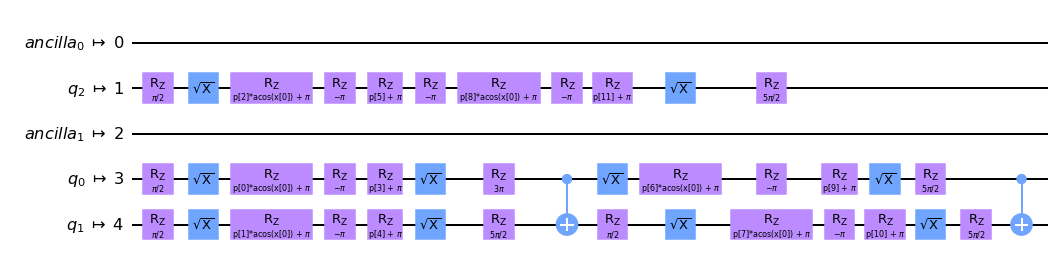

In [5]:
qnn = QNN(pqc, IsingHamiltonian(nqubits), executor)
qnn.pqc.draw()

In [6]:
qnn.get_params()

{'num_qubits': 3,
 'num_layers': 2,
 'closed': False,
 'I': 'S',
 'Z': 'F',
 'X': 'N',
 'ZZ': 'F'}

In [7]:
qnn.get_params()

{'num_qubits': 3,
 'num_layers': 2,
 'closed': False,
 'I': 'S',
 'Z': 'F',
 'X': 'N',
 'ZZ': 'F'}

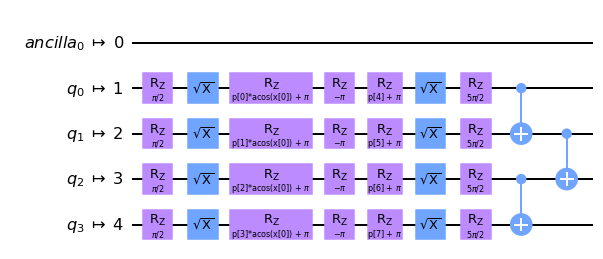

In [8]:
qnn.set_params(num_qubits=4,num_layers=1,ZZ='S')
qnn.pqc.draw()

In [9]:
qnn.operator

SummedOp([PauliOp(Pauli('IIIII'), coeff=1.0*p[0]), PauliOp(Pauli('IIIZI'), coeff=1.0*p[1]), PauliOp(Pauli('IIZII'), coeff=1.0*p[2]), PauliOp(Pauli('IZIII'), coeff=1.0*p[3]), PauliOp(Pauli('ZIIII'), coeff=1.0*p[4]), PauliOp(Pauli('IIZZI'), coeff=1.0*p[5]), PauliOp(Pauli('IZIZI'), coeff=1.0*p[5]), PauliOp(Pauli('IZZII'), coeff=1.0*p[5]), PauliOp(Pauli('ZIIZI'), coeff=1.0*p[5]), PauliOp(Pauli('ZIZII'), coeff=1.0*p[5]), PauliOp(Pauli('ZZIII'), coeff=1.0*p[5])], coeff=1.0, abelian=False)